# JWST Transit Analysis for K2-18b
**Author**: [Your Name]  
**Description**: This notebook visualizes and analyzes JWST transit data for the exoplanet K2-18b, using the transit method.

**Data included**:
- MIRI P750L and NIRISS GR700XD time-series data
- White-light curves and extracted spectra

All files must be in the **same folder** as this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from astropy.time import Time
from astropy.table import Table
import os

## Load and Plot White-Light Curves


🔹 Plotting: jw02722-o002_t001_miri_p750l-slitlessprism_whtlt.ecsv
['MJD', 'whitelight_flux']


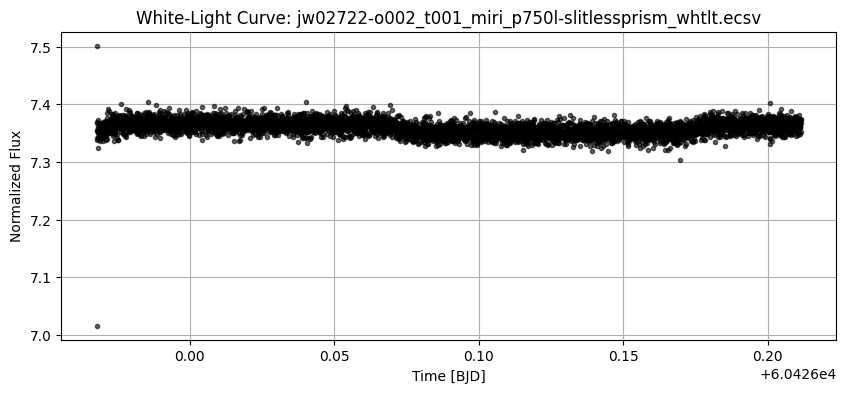


🔹 Plotting: jw02722-o003_t001_niriss_clear-gr700xd-substrip256_whtlt.ecsv
['MJD', 'whitelight_flux']


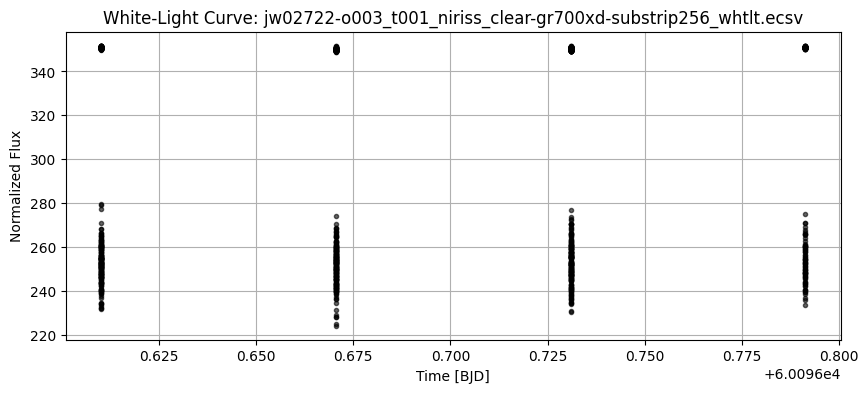


🔹 Plotting: jw02722-o004_t001_miri_p750l-slitlessprism_whtlt.ecsv
['MJD', 'whitelight_flux']


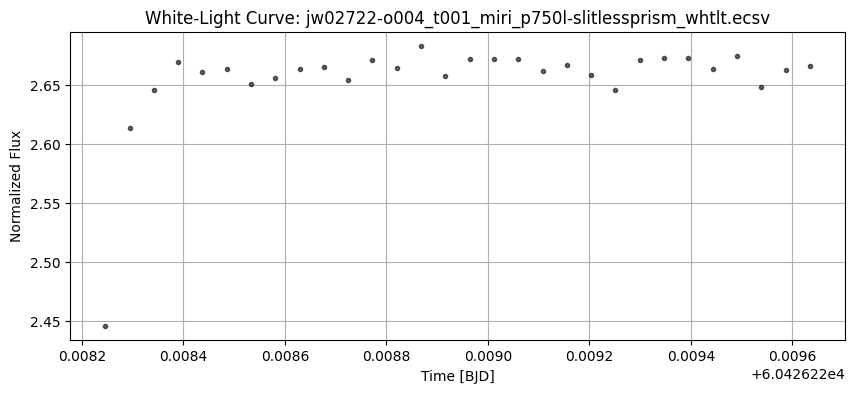

In [2]:
# Load all ECSV white-light files
whtlt_files = [
    'jw02722-o002_t001_miri_p750l-slitlessprism_whtlt.ecsv',
    'jw02722-o003_t001_niriss_clear-gr700xd-substrip256_whtlt.ecsv',
    'jw02722-o004_t001_miri_p750l-slitlessprism_whtlt.ecsv'
]

for fname in whtlt_files:
    print(f"\n🔹 Plotting: {fname}")
    tbl = Table.read(fname, format='ascii.ecsv')
    print(tbl.colnames)
    time = tbl['MJD']
    flux = tbl['whitelight_flux']
    flux_err = np.zeros_like(flux)  # if no error column is present

    plt.figure(figsize=(10, 4))
    plt.errorbar(time, flux, yerr=flux_err, fmt='.k', alpha=0.6)
    plt.title(f"White-Light Curve: {fname}")
    plt.xlabel("Time [BJD]")
    plt.ylabel("Normalized Flux")
    plt.grid(True)
    plt.show()

## Inspect Extracted Spectra (x1dints.fits files)


🔍 Inspecting: jw02722-o002_t001_miri_p750l-slitlessprism_x1dints.fits
wave shape: (388,)
flux shape: (388,)


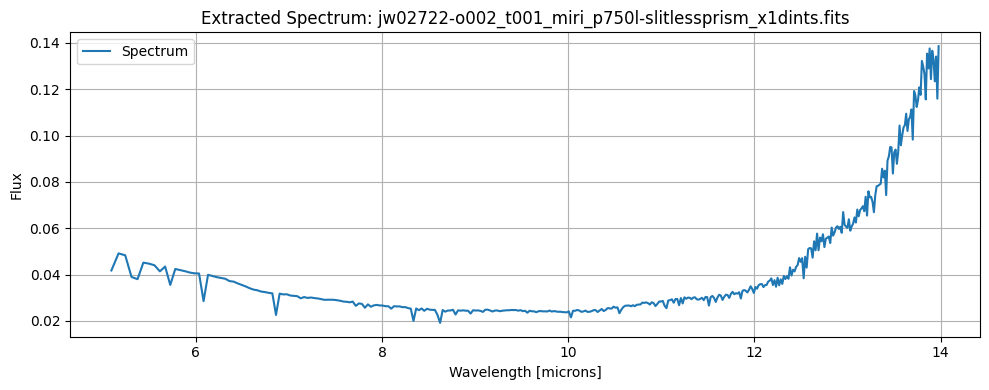

In [3]:
x1d_files = [
    'jw02722-o002_t001_miri_p750l-slitlessprism_x1dints.fits',
    'jw02722-o003_t001_niriss_clear-gr700xd-substrip256_x1dints.fits',
    'jw02722-o004_t001_miri_p750l-slitlessprism_x1dints.fits'
]



import matplotlib.pyplot as plt
from astropy.io import fits
import glob

x1d_files = glob.glob("jw02722-o002_t001_miri_p750l-slitlessprism_x1dints.fits")

for f in x1d_files:
    print(f"\n🔍 Inspecting: {f}")
  
    with fits.open(f) as hdul:
        # Find HDU with WAVELENGTH and FLUX
        target_hdu_index = None
        for i, hdu in enumerate(hdul):
            if hasattr(hdu, 'columns'):
                colnames = hdu.columns.names
                if 'WAVELENGTH' in colnames and 'FLUX' in colnames:
                    target_hdu_index = i
                    break
        
        if target_hdu_index is None:
            print("❌ No HDU with 'WAVELENGTH' and 'FLUX' found.")
            continue

        data = hdul[target_hdu_index].data
        wave = data['WAVELENGTH']
        flux = data['FLUX']

        print("wave shape:", wave.shape)
        print("flux shape:", flux.shape)

        # Plot the 1D spectrum
        plt.figure(figsize=(10, 4))
        plt.plot(wave, flux, label='Spectrum')
        plt.xlabel("Wavelength [microns]")
        plt.ylabel("Flux")
        plt.title(f"Extracted Spectrum: {f}")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()


## Estimate Planet Parameters (Transit Fitting Placeholder)

In [4]:
# This is a basic template for fitting a transit model
# Advanced users can use batman, exoplanet, or PyMC for real fits

# Example: Estimate transit depth from white-light curve
from astropy.table import Table
import numpy as np

# Read white-light curve ECSV file
tbl = Table.read(whtlt_files[0], format='ascii.ecsv')
flux = tbl['whitelight_flux']

# Estimate transit depth (simple method)
depth = 1 - np.nanmin(flux)
print(f"🔎 Estimated transit depth: {depth:.4f} or {depth*1e6:.1f} ppm")
print("Note: Use dedicated transit modeling tools for precise parameters.")

🔎 Estimated transit depth: -6.0160 or -6015992.7 ppm
Note: Use dedicated transit modeling tools for precise parameters.
